In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import time

First we load the data

In [ ]:
df = pd.read_csv('mdlon.csv')
df

at1  at2  at3  at4  at5  at6  at7  at8  at9  at10  ...  at492  at493  \
0     485  477  537  479  452  471  491  476  475   473  ...    481    477   
1     483  458  460  487  587  475  526  479  485   469  ...    478    487   
2     487  542  499  468  448  471  442  478  480   477  ...    481    492   
3     480  491  510  485  495  472  417  474  502   476  ...    480    474   
4     484  502  528  489  466  481  402  478  487   468  ...    479    452   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
1995  490  505  503  474  463  461  519  476  518   467  ...    479    449   
1996  480  475  476  480  495  482  515  479  480   484  ...    474    473   
1997  480  517  631  470  485  474  535  476  493   466  ...    483    479   
1998  484  481  505  478  542  477  518  477  510   472  ...    483    526   
1999  474  493  469  486  521  475  494  479  481   473  ...    476    508   

      at494  at495  at496  at497  at498  at499  at500  T  
0       485    511    485    481    479    475    496 -1  
1       338    513    486    483    492    510    517 -1  
2       650    506    501    480    489    499    498 -1  
3       572    454    469    475    482    494    461  1  
4       435    486    508    481    504    495    511  1  
...     ...    ...    ...    ...    ...    ...    ... ..  
1995    588    499    506    475    463    507    501  1  
1996    424    454    570    476    493    465    485 -1  
1997    687    488    488    483    500    523    481 -1  
1998    750    486    529    484    473    527    485  1  
1999    449    463    533    481    489    516    516  1  

[2000 rows x 501 columns]

Then We split our data to test and train. We also scale our data

In [ ]:
y=df['T']
x=df
x=x.drop(['T'], axis = 1)
feature_names=list(x)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)
x = scaler.transform(x)
x=pd.DataFrame(x,columns =feature_names)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)


# SFS

We define a function called "model_error_sfs" that adds new feature to our feature list and calculates the error of GaussianNB model using the new feature list

In [ ]:
def model_error_sfs(x_train,y_train,selected_features_index,x_test,y_test):
    gnb = GaussianNB()
    x_train_temp=x_train[:, selected_features_index]
    x_test_temp=x_test[:, selected_features_index]
    gnb.fit(x_train_temp,y_train)
    y_predict=gnb.predict(x_test_temp)
    mse=mean_squared_error(np.array(y_test),y_predict)
    return mse

We begins with a model that contains no variables, then starts adding the most significant variables one after the other
until all the variables under consideration are included in the model

In [ ]:
def sfs(x_train,y_train,x_test,y_test,feature_names):
        selected_features_index = []
        error_list=[]
        for j in range(len(feature_names)):
            min_error=float('inf')
            best_index=None
            for i in range(len(feature_names)):
                if i not in selected_features_index:
                    selected_features_index.append(i)
                    error_temp=model_error_sfs(x_train,y_train,selected_features_index,x_test,y_test)
                    if error_temp<=min_error:
                       min_error=error_temp
                       best_index=i
                    selected_features_index.pop()
            selected_features_index.append(best_index)
            error_list.append(min_error)
        return selected_features_index,error_list

In [ ]:
start = time.time()
selected_features ,error_list= sfs(x_train,y_train,x_test,y_test,feature_names)
end = time.time()

In [ ]:
print(selected_features)
print(error_list)

[475, 338, 53, 310, 482, 485, 168, 446, 416, 42, 284, 498, 451, 452, 366, 405, 461, 443, 392, 182, 146, 271, 322, 325, 398, 41, 465, 469, 235, 339, 122, 224, 290, 142, 30, 194, 438, 354, 402, 250, 385, 350, 249, 191, 22, 183, 276, 31, 221, 169, 304, 275, 316, 58, 464, 486, 441, 288, 426, 488, 171, 96, 52, 206, 373, 254, 327, 346, 477, 61, 332, 159, 2, 6, 396, 390, 492, 418, 148, 178, 257, 487, 356, 471, 72, 223, 21, 355, 397, 292, 297, 209, 381, 299, 231, 208, 195, 84, 359, 162, 439, 341, 19, 351, 406, 20, 414, 103, 210, 476, 308, 460, 413, 368, 247, 240, 455, 305, 158, 106, 57, 353, 401, 470, 135, 109, 143, 393, 93, 365, 266, 342, 379, 280, 312, 198, 252, 421, 83, 154, 123, 230, 7, 90, 326, 113, 258, 309, 314, 14, 444, 318, 110, 89, 29, 372, 468, 495, 256, 242, 95, 264, 186, 138, 218, 180, 216, 417, 383, 293, 422, 86, 328, 91, 32, 67, 134, 219, 415, 255, 369, 386, 100, 274, 163, 321, 189, 371, 448, 447, 303, 352, 73, 133, 28, 345, 377, 120, 59, 497, 190, 23, 233, 13, 375, 301, 139, 10

In [ ]:
feature_error_dict = dict(zip(selected_features, error_list))
minKey = min(feature_error_dict, key=feature_error_dict.get)
miner=feature_error_dict[minKey]
print("selected features:")
print(selected_features[:selected_features.index(minKey)+1])
print("best dimension: " + str(len(selected_features[:selected_features.index(minKey)+1])))
print("test error of bayesian classification using selected features: "+str(miner))
print("execution time: "+str((end-start)/60)+" minutes")

selected features:
[475, 338, 53, 310, 482, 485, 168, 446, 416, 42, 284, 498, 451, 452, 366, 405, 461, 443, 392, 182, 146, 271, 322, 325, 398, 41, 465, 469, 235, 339, 122, 224, 290, 142, 30, 194, 438, 354, 402, 250, 385, 350, 249, 191, 22, 183, 276, 31, 221, 169, 304, 275, 316, 58, 464, 486, 441, 288, 426, 488, 171, 96, 52, 206, 373, 254, 327, 346, 477, 61, 332, 159, 2, 6, 396, 390, 492, 418, 148, 178, 257, 487, 356, 471, 72, 223, 21, 355, 397, 292, 297, 209, 381, 299, 231, 208, 195, 84, 359, 162, 439, 341, 19, 351, 406, 20, 414, 103, 210, 476, 308, 460, 413, 368, 247, 240, 455, 305, 158, 106, 57, 353, 401, 470, 135, 109, 143, 393, 93, 365, 266, 342, 379, 280, 312, 198, 252, 421, 83, 154, 123]
best dimension: 141
test error of bayesian classification using selected features: 1.1733333333333333
execution time: 14.73368396361669 minutes


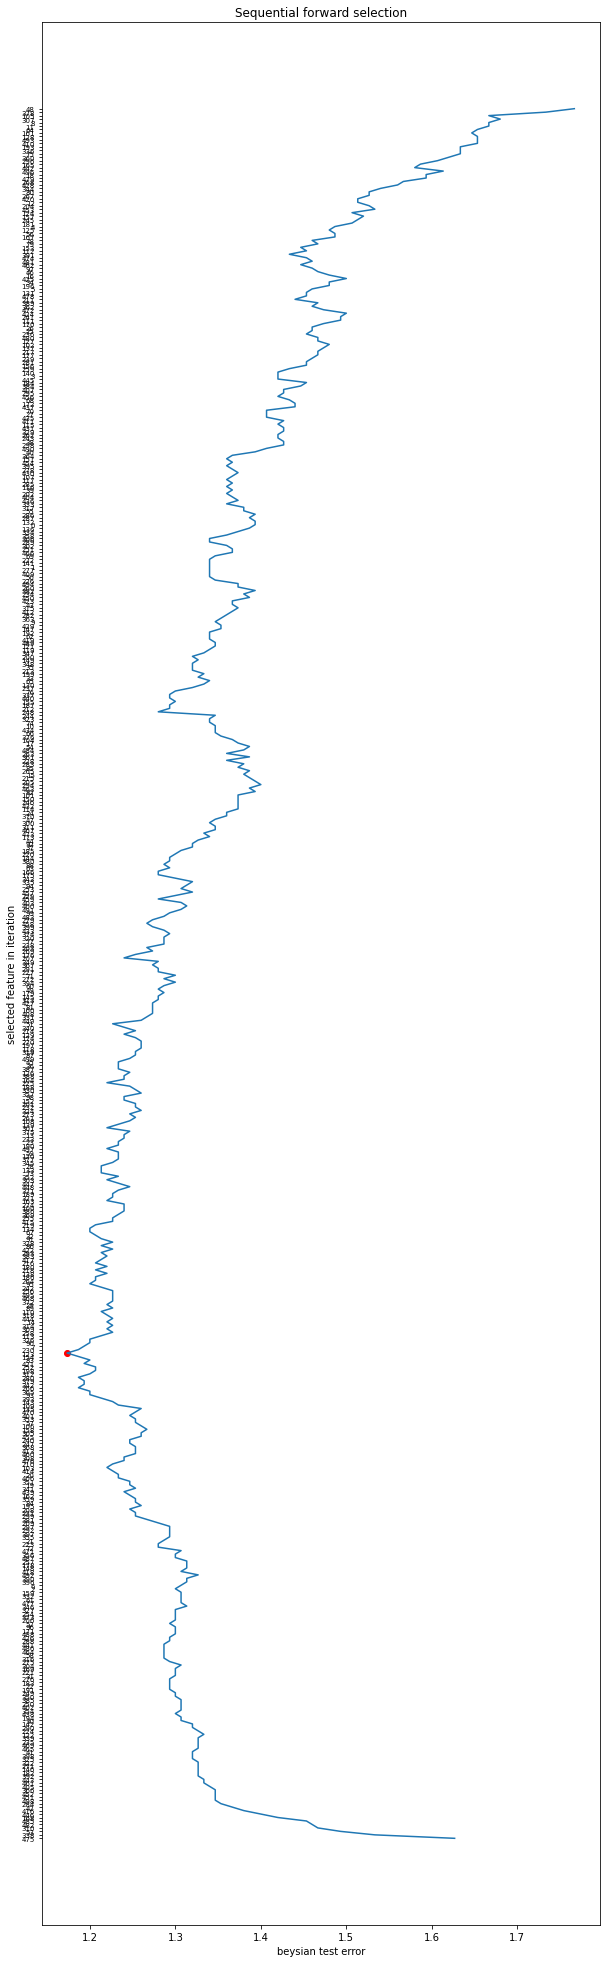

In [ ]:
selected_features_list=list(map(str, selected_features))
plt.figure(figsize = (10, 35)) 
plt.yticks(fontsize=7)
plt.plot(error_list, selected_features_list)
plt.xlabel("beysian test error")
plt.ylabel("selected feature in iteration")
plt.title("Sequential forward selection")
plt.scatter(miner, str(minKey),c='r')

# SBS


We define a function called "model_error_sbe" that removes  feature from our feature list and calculates the error of GaussianNB model using the new feature list

In [ ]:
def model_error_sbe(x_train,y_train,removed_features_index,x_test,y_test):
    gnb = GaussianNB()
    x_train_temp=np.delete(x_train, removed_features_index, axis=1)
    x_test_temp=np.delete(x_test, removed_features_index, axis=1)
    gnb.fit(x_train_temp,y_train)
    y_predict=gnb.predict(x_test_temp)
    mse=mean_squared_error(np.array(y_test),y_predict)
    return mse

We begins with a model that contains all variables,then starts removing the least significant variables one after the other
Until no variable is left in the model

In [ ]:
def sbe(x_train,y_train,x_test,y_test,feature_names):
  removed_features_index=[]
  error_list=[]
  for j in range(len(feature_names)):
    min_error=float('inf')
    best_index=None
    for i in range(len(feature_names)-1):
        if i not in removed_features_index:
            removed_features_index.append(i)
            error_temp=model_error_sbe(x_train,y_train,removed_features_index,x_test,y_test)
            if error_temp<=min_error:
                min_error=error_temp
                best_index=i
            removed_features_index.pop()
    removed_features_index.append(best_index)
    error_list.append(min_error)
  return removed_features_index,error_list

In [ ]:
start = time.time()
removed_features ,error_list= sbe(x_train,y_train,x_test,y_test,feature_names)
end = time.time()
 

In [ ]:
removed_features.pop()
error_list.pop()


499
499
[105, 268, 48, 125, 104, 459, 449, 498, 487, 471, 438, 327, 170, 482, 492, 476, 488, 461, 452, 427, 207, 42, 339, 469, 30, 465, 426, 451, 432, 464, 477, 443, 405, 455, 402, 392, 401, 373, 25, 17, 486, 54, 439, 398, 396, 325, 332, 346, 341, 308, 326, 460, 448, 415, 390, 399, 272, 290, 240, 350, 276, 271, 257, 397, 366, 362, 237, 322, 446, 365, 484, 463, 381, 342, 316, 270, 495, 429, 383, 355, 258, 144, 356, 261, 183, 483, 266, 221, 210, 249, 76, 254, 413, 299, 250, 256, 473, 374, 387, 406, 454, 364, 3, 421, 328, 385, 208, 178, 359, 368, 275, 233, 369, 232, 89, 231, 171, 191, 340, 331, 379, 345, 223, 58, 142, 41, 31, 414, 2, 85, 284, 235, 247, 122, 417, 186, 108, 52, 273, 388, 90, 169, 22, 20, 216, 159, 100, 172, 201, 312, 182, 132, 162, 194, 93, 84, 435, 335, 96, 485, 21, 143, 470, 177, 343, 354, 82, 293, 315, 318, 224, 86, 285, 304, 497, 166, 61, 434, 393, 242, 185, 450, 265, 227, 220, 47, 416, 146, 311, 230, 115, 313, 264, 150, 301, 80, 215, 351, 123, 103, 50, 118, 83, 225, 37

In [ ]:
for i in range(len(error_list)):
  error_list[i]=format(error_list[i],".2f")
print(len(error_list))
print(len(removed_features))
print(removed_features)
print(error_list)

499
499
[105, 268, 48, 125, 104, 459, 449, 498, 487, 471, 438, 327, 170, 482, 492, 476, 488, 461, 452, 427, 207, 42, 339, 469, 30, 465, 426, 451, 432, 464, 477, 443, 405, 455, 402, 392, 401, 373, 25, 17, 486, 54, 439, 398, 396, 325, 332, 346, 341, 308, 326, 460, 448, 415, 390, 399, 272, 290, 240, 350, 276, 271, 257, 397, 366, 362, 237, 322, 446, 365, 484, 463, 381, 342, 316, 270, 495, 429, 383, 355, 258, 144, 356, 261, 183, 483, 266, 221, 210, 249, 76, 254, 413, 299, 250, 256, 473, 374, 387, 406, 454, 364, 3, 421, 328, 385, 208, 178, 359, 368, 275, 233, 369, 232, 89, 231, 171, 191, 340, 331, 379, 345, 223, 58, 142, 41, 31, 414, 2, 85, 284, 235, 247, 122, 417, 186, 108, 52, 273, 388, 90, 169, 22, 20, 216, 159, 100, 172, 201, 312, 182, 132, 162, 194, 93, 84, 435, 335, 96, 485, 21, 143, 470, 177, 343, 354, 82, 293, 315, 318, 224, 86, 285, 304, 497, 166, 61, 434, 393, 242, 185, 450, 265, 227, 220, 47, 416, 146, 311, 230, 115, 313, 264, 150, 301, 80, 215, 351, 123, 103, 50, 118, 83, 225, 37

In [ ]:

feature_error_dict = dict(zip(removed_features, error_list))
minKey = min(feature_error_dict, key=feature_error_dict.get)
miner=feature_error_dict[minKey]
all_removed_features=removed_features[:removed_features.index(minKey)+1]
remaind_features=list(np.arange(len(feature_names)))
for f in all_removed_features:
  remaind_features.remove(f)
print("eliminated features:")
print(all_removed_features)
print("remained features:")
print(remaind_features)
print("best dimension: " + str(len(remaind_features)))
print("test error of bayesian classification using selected features: "+str(miner))
print("execution time: "+str((end-start)/60)+" minutes")



eliminated features:
[105, 268, 48, 125, 104, 459, 449, 498, 487, 471, 438, 327, 170, 482, 492, 476, 488, 461, 452, 427, 207, 42, 339, 469, 30, 465, 426, 451, 432, 464, 477, 443, 405, 455, 402, 392, 401, 373, 25, 17, 486, 54, 439, 398, 396, 325, 332, 346, 341, 308, 326, 460, 448, 415, 390, 399, 272, 290, 240, 350, 276, 271, 257, 397, 366, 362, 237, 322, 446, 365, 484, 463, 381, 342, 316, 270, 495, 429, 383, 355, 258, 144, 356, 261, 183, 483, 266, 221, 210, 249, 76, 254, 413, 299, 250, 256, 473, 374, 387, 406, 454, 364, 3, 421, 328, 385, 208, 178, 359, 368, 275, 233, 369, 232, 89, 231, 171, 191, 340, 331, 379, 345, 223, 58, 142, 41, 31, 414, 2, 85, 284, 235, 247, 122, 417, 186, 108, 52, 273, 388, 90, 169, 22, 20, 216, 159, 100, 172, 201, 312, 182, 132, 162, 194, 93, 84, 435, 335, 96, 485, 21, 143, 470, 177, 343, 354, 82, 293, 315, 318, 224, 86, 285, 304, 497, 166, 61, 434, 393, 242, 185, 450, 265, 227, 220, 47, 416, 146, 311, 230, 115, 313, 264, 150, 301, 80, 215, 351, 123, 103, 50, 118

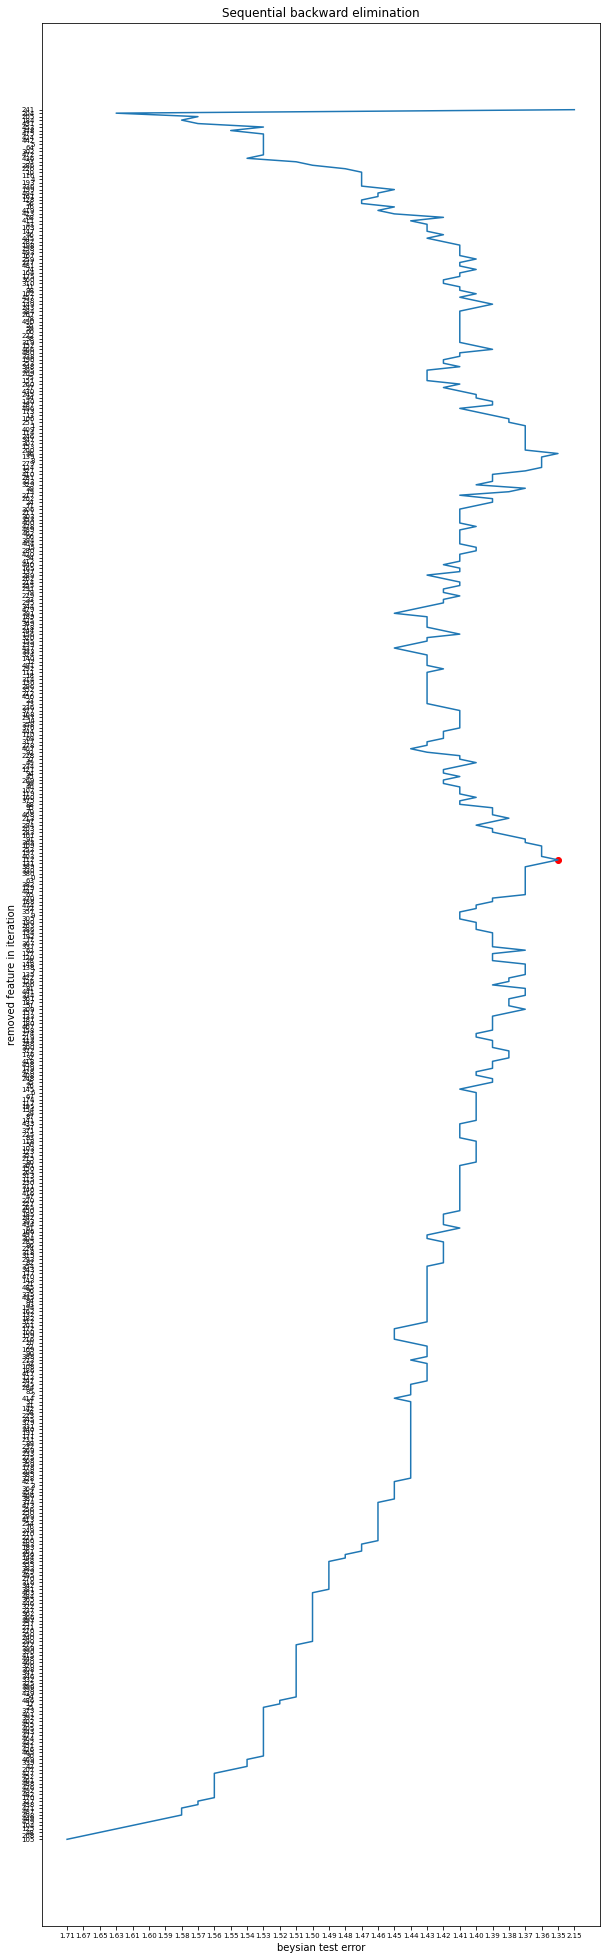

In [ ]:
removed_features_list=list(map(str, removed_features))
plt.figure(figsize = (10, 35)) 
plt.yticks(fontsize=7)
plt.plot(error_list,[str(i) for i in removed_features])
plt.xlabel("beysian test error")
plt.ylabel("removed feature in iteration")
plt.title("Sequential backward elimination")
plt.xticks(fontsize=7)
plt.scatter(miner, str(minKey),c='r')
plt.show()

As we saw, best test error in SBE algorithm was 1.35

# C

SBS is slower becouse it starts with all features but it usually is more accurate than SFS algorithm. We also showed the time, error and features in previous parts